**Global UFO Sightings: A Geospatial, Temporal, and Anomaly Analysis**

**STEP 1: Project Introduction**

**1. Introduction:**

The Global UFO Sightings Exploratory Data Analysis project aims to investigate patterns and trends in reported UFO sighting events collected from across the world over several decades. Using data provided by the National UFO Reporting Center (NUFORC), this project explores when and where sightings occur, how they have changed over time, and what characteristics—such as reported shapes and durations—are most commonly associated with these events. Since the dataset is based on human-reported observations, it contains inconsistencies, missing values, and outliers, making it an ideal real-world dataset for exploratory data analysis. Through systematic data cleaning, visualization, and analysis, this project seeks to uncover meaningful insights related to temporal trends, geographic hotspots, seasonal patterns, and anomalous sightings.

**2. Business Problem:**

Organizations and researchers that monitor unusual aerial phenomena and public reports often deal with large volumes of unstructured and inconsistent data. Without proper analysis, it becomes difficult to understand whether reported UFO sightings follow meaningful patterns over time, are concentrated in specific geographic regions, or exhibit unusual characteristics that may require further investigation.

The challenge is to systematically analyze global UFO sighting reports to identify temporal trends, geographic hotspots, common sighting characteristics, seasonal behavior, and anomalous events. By transforming raw sighting data into structured insights through exploratory data analysis and visualization, stakeholders can better understand reporting behavior, detect unusual patterns, and support data-driven research and monitoring efforts.

**3. Objectives:**
1. To understand the overall structure, quality, and characteristics of the global UFO sightings dataset.
2. To analyze temporal trends in UFO sightings and identify how reporting patterns have changed over time.
3. To examine the geographic distribution of UFO sightings and identify regions with higher reporting activity.
4. To identify the most commonly reported UFO shapes and analyze their frequency across the dataset.
5. To study the distribution of sighting durations and detect unusual or anomalous duration patterns.
6. To investigate the relationship between reported UFO shapes and sighting durations.
7. To identify seasonal patterns in UFO sighting reports.
8. To summarize key findings using effective visualizations to support data-driven insights.

**STEP 2: Business Questions**

The following business questions guide the exploratory data analysis and define the direction of the visualizations and insights generated in this project:
1. How have UFO sightings changed over time?
2. Which decades experienced the highest number of UFO sightings?
3. Which countries report the highest number of UFO sightings?
4. Are UFO sightings geographically clustered or evenly distributed across locations?
5. What are the most commonly reported UFO shapes?
6. Do certain UFO shapes tend to have longer sighting durations than others?
7. Are UFO sightings seasonal in nature?
8. Are there anomalous UFO sightings in terms of duration or rarity?

**STEP 3: Data Loading & Overview**

In [1]:
# Core data handling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Date & time handling
from datetime import datetime
# Text analysis (optional)
import re
from collections import Counter
# Geospatial analysis (optional)
import folium
from folium.plugins import HeatMap
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


**Load CSV**

In [4]:
# Load the UFO sightings dataset, skipping bad lines
df = pd.read_csv("/content/complete.csv", on_bad_lines='skip')
# Display the first 5 rows of the dataset
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


**Display dataset information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


**Display statistical summary of numerical columns**

In [6]:
df.describe()

,longitude
count,88679.000000
mean,-85.021836
std,41.421744
min,-176.658056
25%,-112.073333
50%,-87.650000
75%,-77.769738
max,178.441900


**Check Dataset Shape**

In [7]:
# Dataset shape
df.shape

(88679, 11)

**View Column Names**

In [8]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

**Check Data Types of Each Column**

In [9]:
df.dtypes

,0
datetime,object
city,object
state,object
country,object
shape,object
duration (seconds),object
duration (hours/min),object
comments,object
date posted,object
latitude,object


**Check Missing Values**

In [10]:
# Count of missing values in each column
df.isnull().sum()

,0
datetime,0
city,0
state,7409
country,12365
shape,2922
duration (seconds),2
duration (hours/min),3019
comments,35
date posted,0
latitude,0


**STEP 4: Data Cleaning & Preparation**

**Convert datetime Column**

In [12]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# Check conversion
df['datetime'].head()


,datetime
0,1949-10-10 20:30:00
1,1949-10-10 21:00:00
2,1955-10-10 17:00:00
3,1956-10-10 21:00:00
4,1960-10-10 20:00:00


**Handle Missing Values**

In [13]:
# Drop rows with missing datetime
df = df.dropna(subset=['datetime'])
# Fill missing categorical values with "Unknown"
df['shape'] = df['shape'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')


**Clean Duration Outliers**

In [14]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df = df[df['duration (seconds)'] > 0]
upper_limit = df['duration (seconds)'].quantile(0.99)
df = df[df['duration (seconds)'] <= upper_limit]


**Group Rare UFO Shapes**

In [18]:
# Find top 10 most common shapes
top_shapes = df['shape'].value_counts().nlargest(10).index
# Group remaining shapes as "Other"
df['shape_cleaned'] = df['shape'].apply(
    lambda x: x if x in top_shapes else 'Other'
)
# Verify shape distribution
df['shape_cleaned'].value_counts()

,count
shape_cleaned,
light,16582
Other,14034
triangle,7848
circle,7607
fireball,6219
other,5614
unknown,5542
sphere,5403
disk,5215


**Feature Engineering (Year, Month, Decade)**

**1. Extract time features**

In [20]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['decade'] = (df['year'] // 10) * 10
df[['datetime', 'year', 'month', 'decade']].head()


,datetime,year,month,decade
0,1949-10-10 20:30:00,1949,10,1940
1,1949-10-10 21:00:00,1949,10,1940
2,1955-10-10 17:00:00,1955,10,1950
3,1956-10-10 21:00:00,1956,10,1950
4,1960-10-10 20:00:00,1960,10,1960


**STEP 5: Exploratory Data Analysis**

**Q1: How have UFO sightings changed over time?**

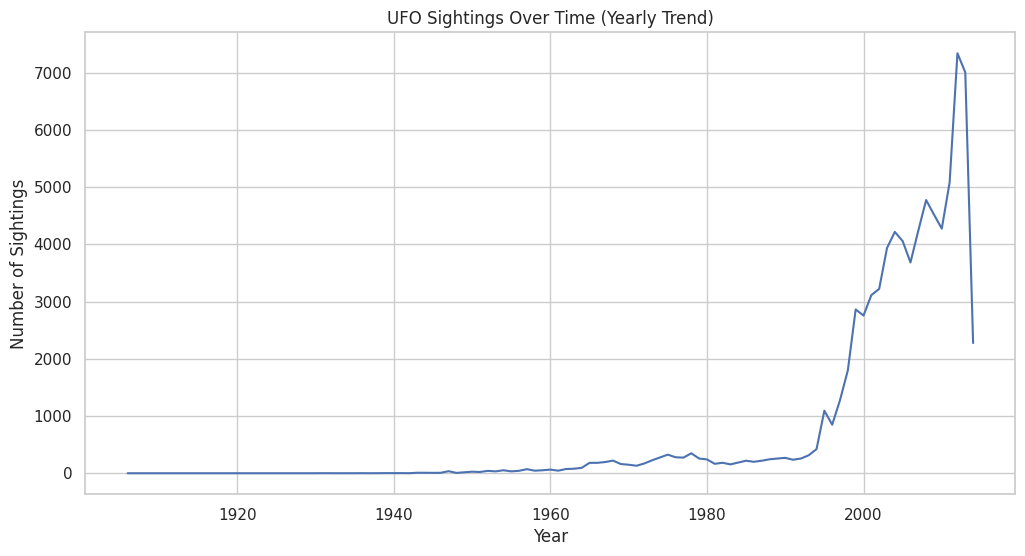

In [21]:
# UFO sightings per year
sightings_per_year = df.groupby('year').size()
# Line plot
plt.figure(figsize=(12,6))
plt.plot(sightings_per_year)
plt.title('UFO Sightings Over Time (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


The visualization shows a clear increase in UFO sighting reports over time, particularly after the 1990s. This trend may reflect improved reporting systems, increased public awareness, and the influence of media and internet accessibility rather than an actual rise in UFO occurrences.

**Q2: Which decades reported the highest number of UFO sightings?**

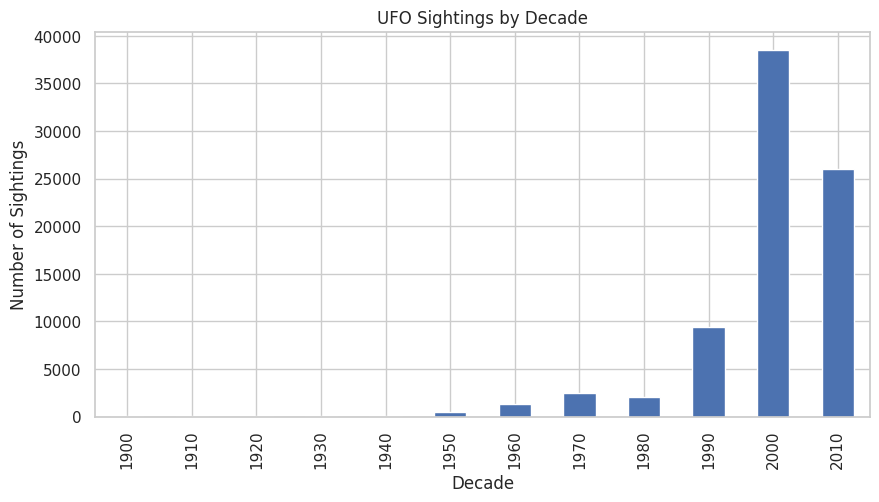

In [22]:
# UFO sightings per decade
sightings_per_decade = df.groupby('decade').size()
# Bar chart
plt.figure(figsize=(10,5))
sightings_per_decade.plot(kind='bar')
plt.title('UFO Sightings by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Sightings')
plt.show()


The decade-wise analysis reveals that UFO sightings surged significantly during recent decades, with the highest concentration occurring in the late 20th and early 21st centuries. This suggests increased reporting behavior and growing public engagement with unexplained aerial phenomena.

**Q3: Which countries report the highest number of UFO sightings?**

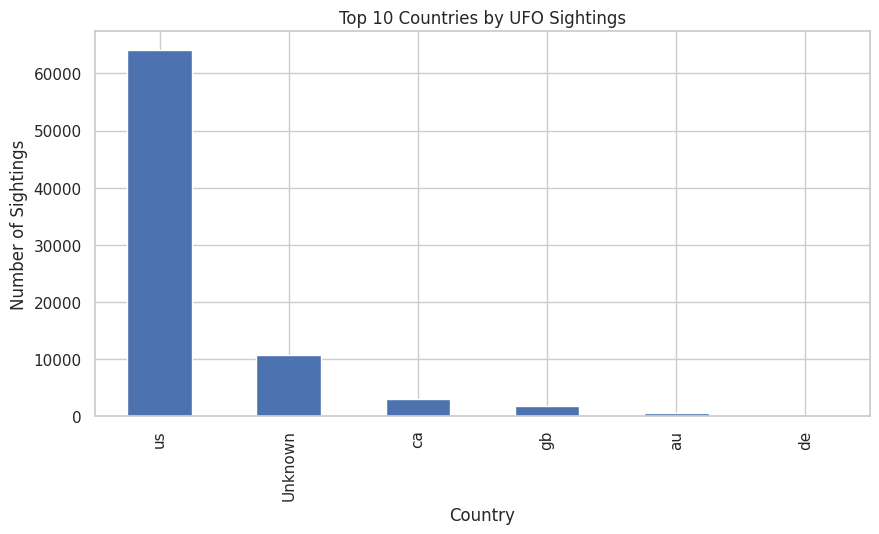

In [23]:
# UFO sightings by country
country_counts = df['country'].value_counts().head(10)
# Bar plot
plt.figure(figsize=(10,5))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries by UFO Sightings')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.show()


The analysis shows that the majority of UFO sightings are reported from a small number of countries, with the United States contributing the highest volume. This concentration may reflect population size, media influence, cultural openness to reporting, and the availability of reporting platforms rather than true geographic frequency.

**Q4: Which states/regions have the highest UFO sightings (within the US)?**

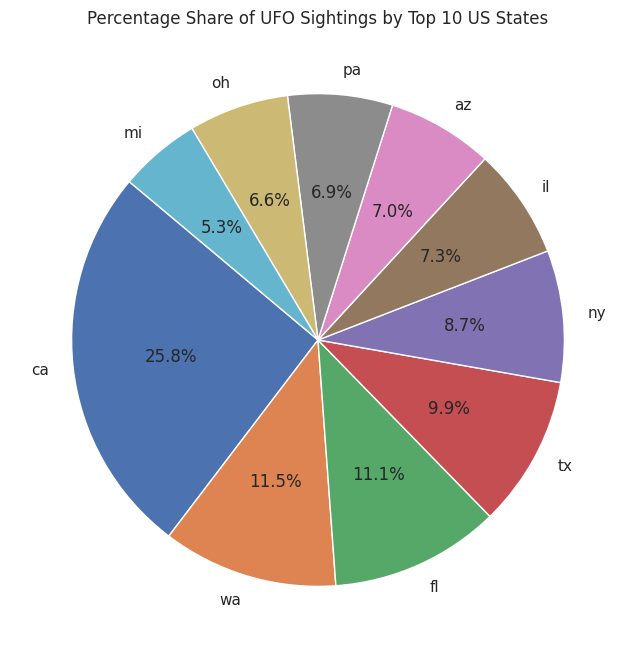

In [25]:
# Pie chart for state-wise contribution
plt.figure(figsize=(8,8))
state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Share of UFO Sightings by Top 10 US States')
plt.ylabel('')
plt.show()


The visualization highlights that certain US states consistently report higher numbers of UFO sightings. These states are typically more populous and geographically expansive, suggesting that higher reporting frequency may be influenced by population density and observation opportunities rather than increased UFO activity.

**Q5: What are the most commonly reported UFO shapes?**

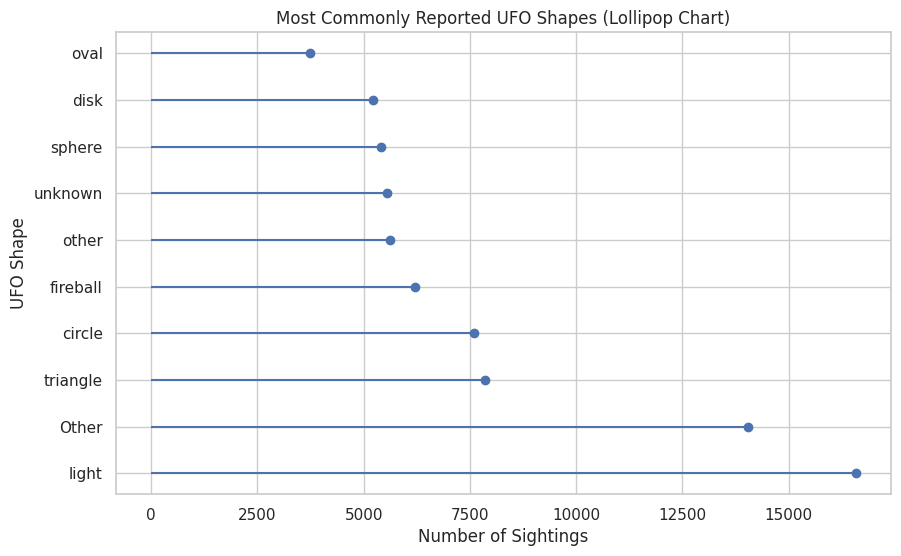

In [27]:
plt.figure(figsize=(10,6))
plt.hlines(y=shape_counts.index, xmin=0, xmax=shape_counts.values)
plt.plot(shape_counts.values, shape_counts.index, "o")
plt.title('Most Commonly Reported UFO Shapes (Lollipop Chart)')
plt.xlabel('Number of Sightings')
plt.ylabel('UFO Shape')
plt.show()


The analysis indicates that a limited number of shapes dominate UFO sighting reports, with “light”, “triangle”, and “circle” being the most frequently observed. The prevalence of these shapes suggests that many sightings may involve ambiguous or distant light sources, which are commonly perceived as unexplained phenomena.

**Q6: Do different UFO shapes have different average sighting durations?**

<Figure size 1200x600 with 0 Axes>

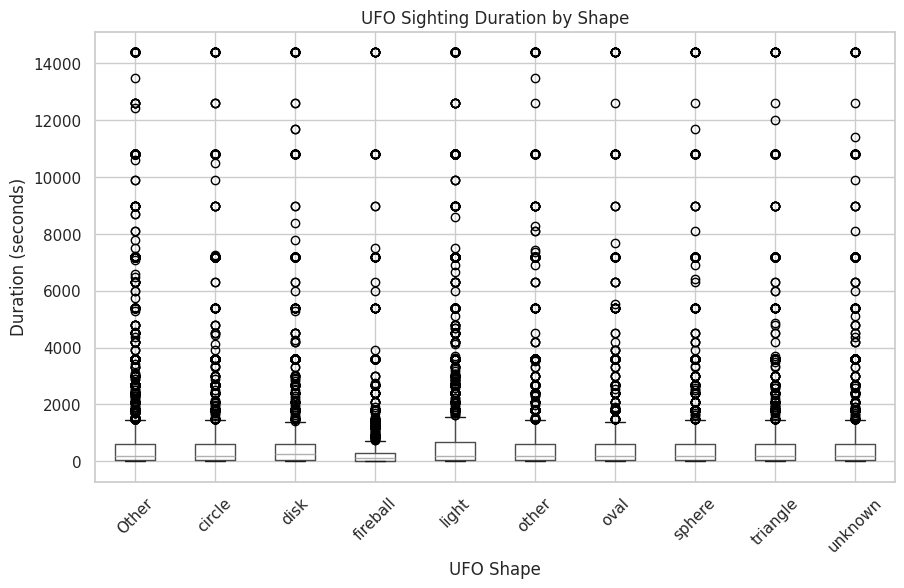

In [28]:
# Average duration by shape (box plot)
top_shapes_duration = df[df['shape_cleaned'].isin(shape_counts.index)]

plt.figure(figsize=(12,6))
top_shapes_duration.boxplot(
    column='duration (seconds)',
    by='shape_cleaned',
    rot=45
)
plt.title('UFO Sighting Duration by Shape')
plt.suptitle('')
plt.xlabel('UFO Shape')
plt.ylabel('Duration (seconds)')
plt.show()


The box plot reveals noticeable variation in sighting durations across different UFO shapes. Certain shapes exhibit longer median durations and higher variability, suggesting that shape perception may influence how long witnesses observe or remember the event.

**Q7: Are UFO sightings affected by seasonal or monthly patterns?**

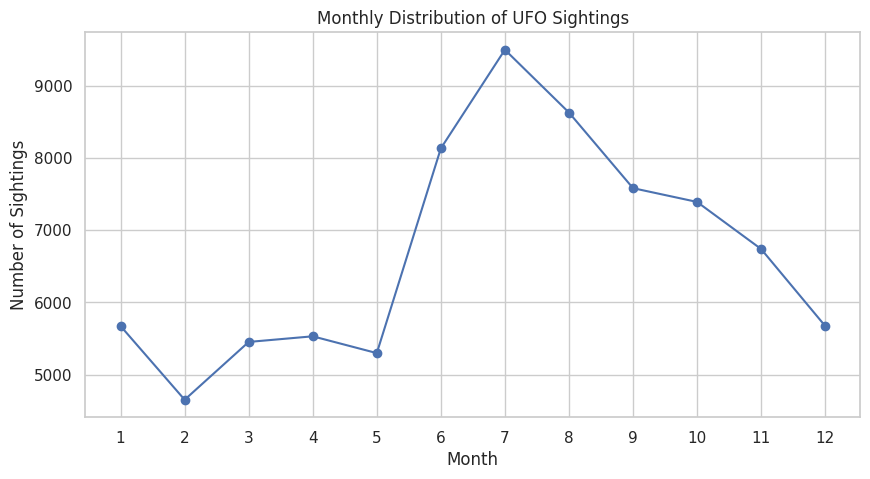

In [29]:
# UFO sightings by month
monthly_counts = df.groupby('month').size()

plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Distribution of UFO Sightings')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(1, 13))
plt.show()


The monthly trend shows noticeable variation in UFO sightings throughout the year. Sightings tend to increase during warmer months, possibly due to longer daylight hours, increased outdoor activity, and clearer night skies, which enhance observation opportunities.

**Q8: Are there anomalous UFO sightings with unusually long durations?**

In [30]:
# Calculate IQR for duration
Q1 = df['duration (seconds)'].quantile(0.25)
Q3 = df['duration (seconds)'].quantile(0.75)
IQR = Q3 - Q1

# Define anomaly bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies
anomalies = df[
    (df['duration (seconds)'] < lower_bound) |
    (df['duration (seconds)'] > upper_bound)
]

anomalies[['datetime', 'city', 'state', 'shape_cleaned', 'duration (seconds)']].head()


,datetime,city,state,shape_cleaned,duration (seconds)
0,1949-10-10 20:30:00,san marcos,tx,Other,2700.0
1,1949-10-10 21:00:00,lackland afb,tx,light,7200.0
12,1970-10-10 16:00:00,bellmore,ny,disk,1800.0
17,1973-10-10 19:00:00,niantic,ct,disk,1800.0
20,1974-10-10 19:30:00,hudson,ma,other,2700.0


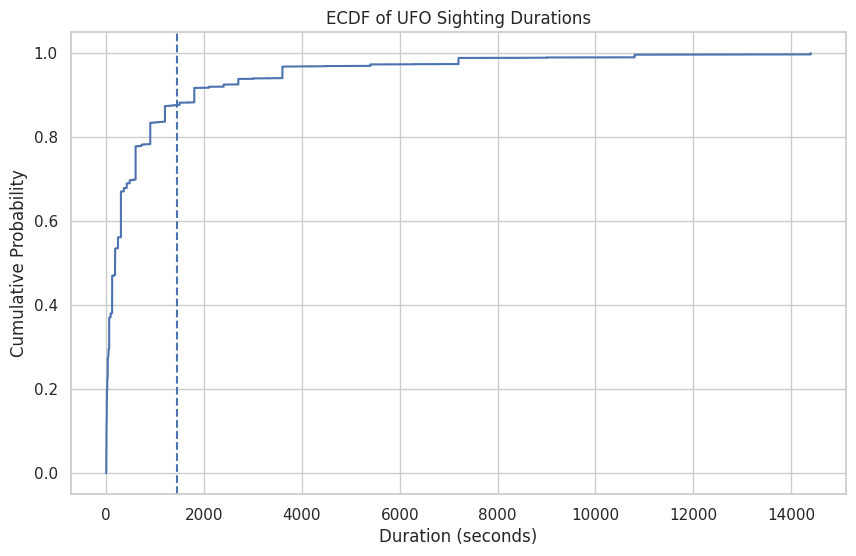

In [35]:
sorted_duration = np.sort(df['duration (seconds)'])
ecdf = np.arange(1, len(sorted_duration)+1) / len(sorted_duration)

plt.figure(figsize=(10,6))
plt.plot(sorted_duration, ecdf)
plt.axvline(upper_bound, linestyle='--')
plt.title('ECDF of UFO Sighting Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Cumulative Probability')
plt.show()


**STEP 6: Key Insights & Conclusion**

**Key Insights:**
1. UFO sighting reports have increased significantly over time, especially after the 1990s, indicating higher public awareness and improved reporting platforms rather than a sudden rise in unexplained events.
2. The majority of UFO sightings are reported from a small number of countries, with the United States contributing the highest volume, suggesting strong cultural and technological influence on reporting behavior.
3. Within the United States, sightings are concentrated in a few populous states, highlighting regional reporting hotspots rather than uniform geographic distribution.
4. A limited number of UFO shapes, such as light, triangle, and circle, dominate reported sightings, while many other shapes occur infrequently and were grouped to simplify analysis.
5. Seasonal analysis reveals higher UFO sightings during warmer months, likely driven by increased outdoor activity and better visibility conditions.
6. Duration-based anomaly detection identified a small number of unusually long sightings, which may represent reporting errors, misjudgments, or rare extended observations.

**Conclusion:**

This exploratory data analysis of the UFO Sightings dataset demonstrates how structured data preparation and visualization techniques can uncover meaningful patterns from complex observational data. The analysis reveals clear temporal growth in sightings, strong geographic concentration, dominant shape patterns, seasonal influences, and the presence of anomalous reports. While the dataset does not provide evidence of extraterrestrial activity, it offers valuable insights into human perception, reporting behavior, and environmental factors influencing UFO observations. Overall, this project highlights the importance of EDA in transforming raw data into interpretable insights that support informed analysis and effective storytelling.

**Step 7:- Save Clean Dataset**

In [36]:
# Save cleaned dataset
df.to_csv("ufo_sightings_cleaned.csv", index=False)
